# Ordered Pathing

At agent level, figuring out what order the units should decide their next actions, then building up a pathing cost map as each unit figures out it's next actions

## Asking GPT:

This is what I am asking GPT:

"""

Here's  some information for the first specific question:
- I'll have a list of units that are currently on a collision course or need to act this turn
- The other units will be in list of units that have no more actions this turn
- I want to collect information from the units into a pandas dataframe with a column for each of the pieces of information (mostly numeric, bools, and strings)
    - Include:
        - distance to factory
        - Has enough power to move
        - How much power
        - How much ice
        - How much ore
- Then using that dataframe I want to order the units from most important to least important by choosing the order of the columns to sort by
    - I think this will be, has enough power, lowest power, highest resources if moving, lowest resources if mining
- A costmap for movement will be calculated based on a rubble array
- Then starting from the most important unit first and going through all units that do need to act this turn:
    - A copy of the costmap is made
    - For the units that have no more actions this turn, their paths get added to the costmap as progressively blurred out gaussians (amplitude highest when index position = distance, sigma increasing with distance) for each position in the path based on the distance from the unit currently deciding its new path (I'll then replace cost with -1 (impassable) in some specific high cost places after that to prevent a collision for the next N steps in the new path)
    - Then the unit chooses it's path to a destination position with that new costmap
        - If the cost is very high underneath itself, it must at least move some where even if it can't reach it's  destination
    - Then that unit is added to the list of units that have no more actions this turn
    
I would like you to write the framework of this with classes and methods assuming many functions already exist.    
"""

**Followed by:**

""""""

Could you add a short docstring for each method with the following format:
"""
<short description of what function does>

Args:
    <arg>: <short description of arg>
    ...

Returns:
    <short description of what this method will return>

"""


At the same time, can you add some type hinting for the args (e.g. ```def func(self, value: int, costmap: np.ndarray) -> np.ndarray:```)
        
""""""

## GPTs response

```
import pandas as pd
import numpy as np
from typing import List

class Unit:
    # Your existing Unit class implementation goes here
    pass

class Factory:
    # Your existing Factory class implementation goes here
    pass

class Master:
    # Your existing Master class implementation goes here
    pass

class Agent:
    def __init__(self, master: Master):
        self.master = master

    def collect_unit_data(self, units: List[Unit]) -> pd.DataFrame:
        """
        Collects data from units and stores it in a pandas dataframe.

        Args:
            units: List of Unit objects.

        Returns:
            A pandas dataframe containing the unit data.
        """
        data = []
        for unit in units:
            data.append([
                unit.distance_to_factory(),
                unit.has_enough_power(),
                unit.power,
                unit.ice,
                unit.ore
            ])

        df = pd.DataFrame(data, columns=['distance_to_factory', 'has_enough_power', 'power', 'ice', 'ore'])

        return df

    def sort_units_by_priority(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Sorts units by priority based on the provided dataframe.

        Args:
            df: A pandas dataframe containing the unit data.

        Returns:
            A sorted pandas dataframe with units ordered by priority.
        """
        sorted_df = df.sort_values(
            by=['has_enough_power', 'power', 'ice', 'ore'],
            ascending=[False, True, False, True],
        )
        
        return sorted_df

    def create_costmap(self) -> np.ndarray:
        """
        Calculates the costmap based on the rubble array.

        Returns:
            A numpy array representing the costmap.
        """
        # costmap = calculate_costmap(rubble_array)
        pass

    def update_costmap_with_paths(self, costmap: np.ndarray, units: List[Unit]) -> None:
        """
        Updates the costmap with the paths of the units that have no more actions this turn.

        Args:
            costmap: A numpy array representing the costmap.
            units: List of Unit objects with no more actions this turn.
        """
        # for unit in units:
        #     update_costmap_with_gaussian_paths(costmap, unit)
        pass

    def choose_path(self, unit: Unit, costmap: np.ndarray) -> None:
        """
        Chooses the path for the unit based on the updated costmap.

        Args:
            unit: A Unit object that needs to choose a path.
            costmap: A numpy array representing the updated costmap.
        """
        # path = find_optimal_path(unit, costmap)
        pass

    def process_units(self, units_to_act: List[Unit], units_no_actions: List[Unit]) -> None:
        """
        Processes the units by choosing the paths for units that need to act this turn.

        Args:
            units_to_act: List of Unit objects that need to act this turn.
            units_no_actions: List of Unit objects that have no more actions this turn.
        """
        unit_data = self.collect_unit_data(units_to_act)
        sorted_units = self.sort_units_by_priority(unit_data)

        costmap = self.create_costmap()

        for unit in sorted_units.itertuples():
            costmap_copy = np.copy(costmap)

            self.update_costmap_with_paths(costmap_copy, units_no_actions)

            self.choose_path(unit, costmap_copy)

            units_no_actions.append(unit)

if __name__ == '__main__':
    master = Master()
    agent = Agent(master)

    units_to_act =

```

# Start of Testing

In [33]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import logging
import sys
import os
from pathlib import Path

from util import MyEnv, figures_to_subplots, show_env
from config import update_logging_level
import util

parent_dir = Path(os.getcwd()).resolve().parent
if str(parent_dir) not in sys.path:
    print(f"Adding {parent_dir} to path")
    sys.path.insert(0, str(parent_dir))

from agent import Agent
from basic_agent import Agent as BasicAgent

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


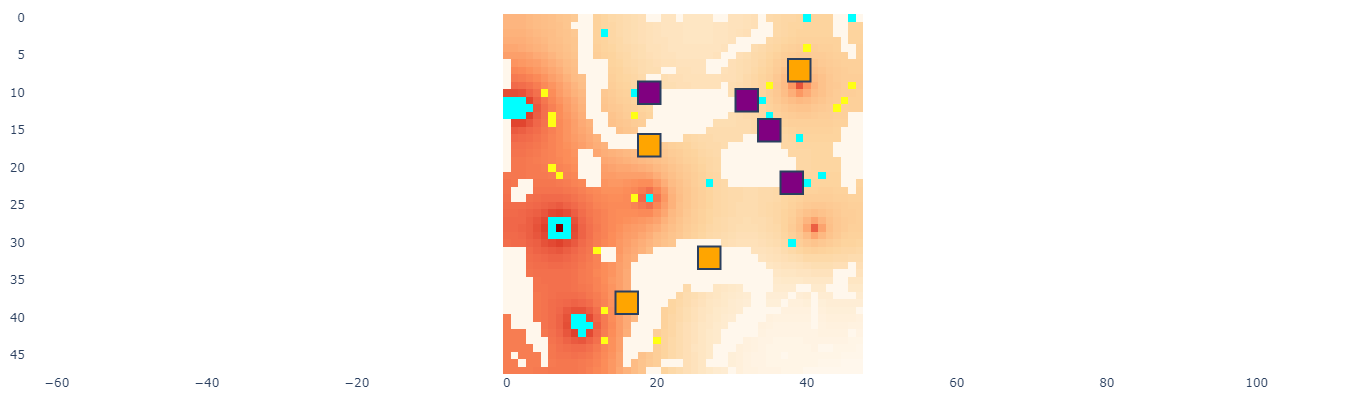

In [34]:
update_logging_level(logging.WARNING)
seed = 42
# seed = 178220973

# Run initial setup (placing factories)
myenv = MyEnv(seed, Agent, BasicAgent)
myenv.run_early_setup()
myenv.show()

In [22]:
# update_logging_level(logging.WARNING)
# while True:
#     myenv.step()
#     if 'unit_19' in myenv.agent.master.units.friendly.light:
#         unit = myenv.agent.master.units.friendly.light['unit_19']
#         if len(unit.action_queue) <= 1:
#             break

# myenv.show()

  0%|          | 0/151 [00:00<?, ?it/s]

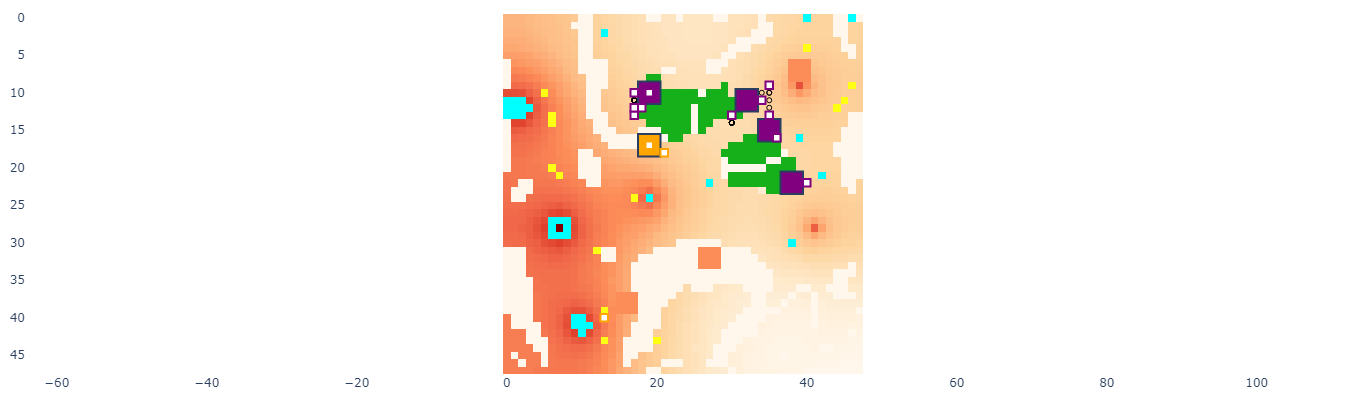

In [23]:
# Run a few steps into game
update_logging_level(logging.DEBUG)
myenv.run_to_step(1)
myenv.show()

In [24]:
myenv.agent.master.factories.friendly["factory_2"].get_light_actions()

UnitActions(mining_ice={}, mining_ore={'unit_16': <unit_manager.FriendlyUnitManger object at 0x000001A32789B670>}, clearing_rubble={'unit_25': <unit_manager.FriendlyUnitManger object at 0x000001A326877B50>, 'unit_32': <unit_manager.FriendlyUnitManger object at 0x000001A3273DE4C0>, 'unit_33': <unit_manager.FriendlyUnitManger object at 0x000001A32745CCA0>}, attacking={}, nothing={})

In [ ]:
# myenv.undo()
# myenv.show()

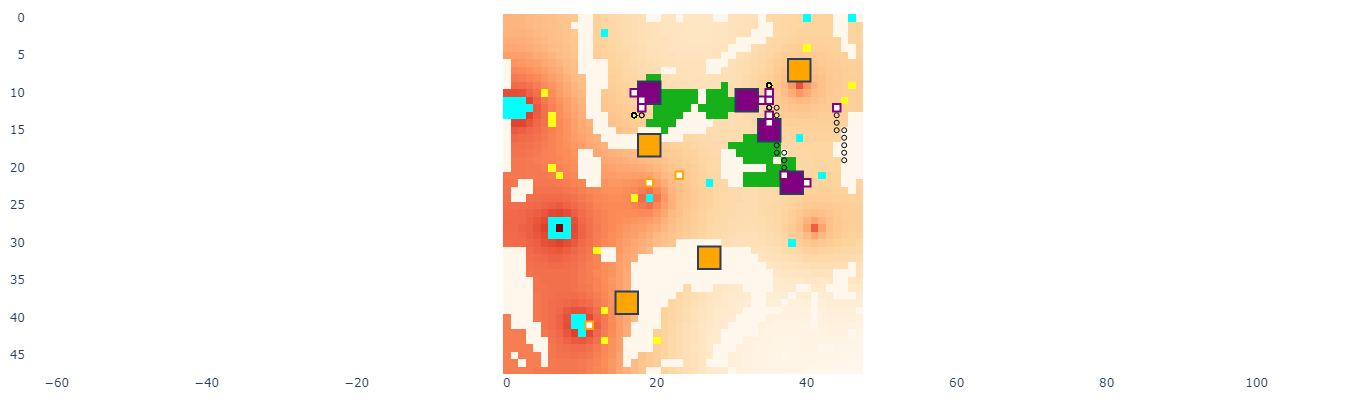

In [12]:
# myenv.undo()
update_logging_level(logging.DEBUG)
myenv.step()
myenv.show()

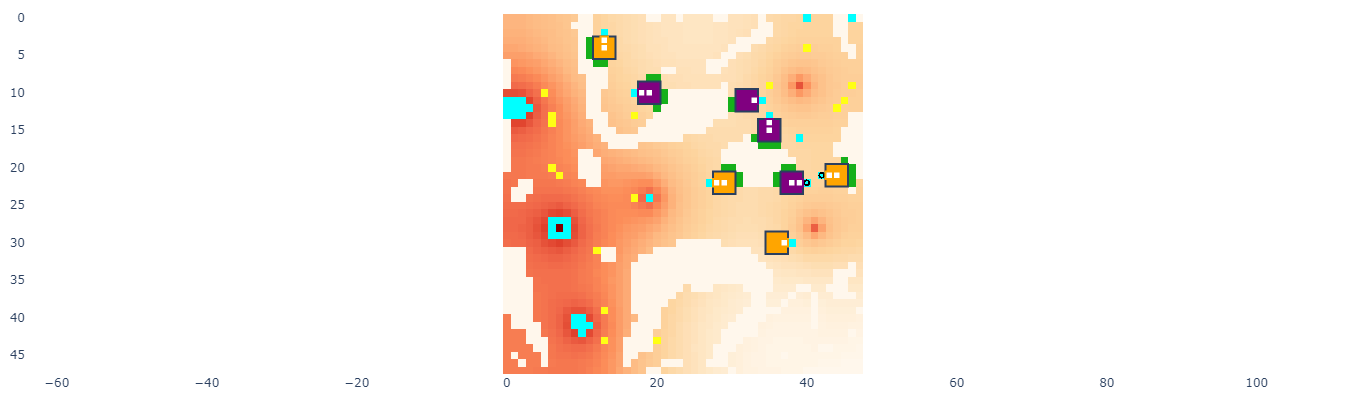

In [9]:
myenv.undo()
myenv.show()

In [ ]:
# agent._beginning_of_step_update(myenv.env_step, myenv.obs[agent.player], 1)
myenv.agent._beginning_of_step_update(myenv.env_step, myenv.obs[myenv.agent.player], 1)
myenv.other_agent._beginning_of_step_update(
    myenv.env_step, myenv.obs[myenv.other_agent.player], 1
)

In [ ]:
unit1 = myenv.agent.master.units.get_unit("unit_19")
unit2 = myenv.other_agent.master.units.get_unit("unit_23")
unit1, unit2

In [ ]:
from pprint import pprint

for u in (unit1, unit2):
    pprint(u.action_queue)

for u in (unit1, unit2):
    pprint(u.current_path)

In [ ]:
import pandas as pd
from agent import TurnPlanner
import copy

tp = TurnPlanner(agent.master)
mining_planner = agent.mining_planner
rubble_clearing_planner = agent.rubble_clearing_planner

units_to_act = tp.units_should_consider_acting(tp.master.units.friendly.all)

In [ ]:
# paths = tp.get_unit_paths()
# p1 = paths.friendly.light["unit_16"]
# p2 = paths.friendly.heavy["unit_8"]
# for i in range(2):
#     print(p1[i], p2[i])
#     print(np.array_equal(p1[i], p2[i]))

In [ ]:
paths = tp.get_unit_paths()
update_logging_level(5)
paths.calculate_collisions()

In [ ]:
# myenv.obs["player_1"]["units"]["player_1"]["unit_23"]
myenv.obs["player_0"]["real_env_steps"]

In [ ]:
unit_data_df = tp.collect_unit_data(units_to_act.needs_to_act)
sorted_data_df = tp.sort_units_by_priority(unit_data_df)

base_costmap = tp.base_costmap()

In [ ]:
sorted_data_df["unit_id"] = sorted_data_df.apply(lambda row: row.unit.unit_id, axis=1)
sorted_data_df

In [ ]:
for index, row in sorted_data_df.iterrows():
    # Note: Row is a pd.Series of the unit_data_df
    # Remove from needs_to_act queue since we are calculating these actions now
    unit = row.unit
    units_to_act.needs_to_act.pop(unit.unit_id)
    travel_costmap = tp.get_travel_costmap(
        unit=unit,
        base_costmap=base_costmap,
        units_to_act=units_to_act,
    )

    unit_before = copy.deepcopy(unit)
    # Figure out new actions for unit  (i.e. RoutePlanners)
    success = tp.calculate_actions_for_unit(
        base_costmap=base_costmap,
        travel_costmap=travel_costmap,
        df_row=row,
        unit=unit,
        mining_planner=mining_planner,
        rubble_clearing_planner=rubble_clearing_planner,
    )

    # If first X actions are the same, don't update (unnecessary cost for unit)
    if np.all(
        np.array(unit.action_queue[: tp.actions_same_check])
        == np.array(unit_before.action_queue[: tp.actions_same_check])
    ):
        logging.info(
            f"For {unit.unit_id}, first {tp.actions_same_check} actions same, not update units action queue"
        )
        #  Store the unit_before (i.e. not updated at all since it's not changing it's actions)
        units_to_act.should_not_act[unit.unit_id] = unit_before
        tp.master.units.friendly.replace_unit(unit.unit_id, unit_before)
    else:
        units_to_act.has_updated_actions[unit.unit_id] = unit

actions = {}

# TODO: One last check for collisions?

for unit_id, unit in units_to_act.has_updated_actions.items():
    if len(unit.action_queue) > 0:
        actions[unit_id] = unit.action_queue

In [ ]:
agent.master.units.friendly.get_unit("unit_16").current_path

In [ ]:
figs = []
figs.append(util.show_map_array(base_costmap).update_layout(title="base costmap"))
figs.append(util.show_map_array(travel_costmap).update_layout(title="travel costmap"))

# new_cost = tp.update_costmap_with_unit(base_costmap, this_unit=unit1, other_unit=unit2)
# figs.append(util.show_map_array(travel_costmap).update_layout(title="travel costmap"))

fig = (
    figures_to_subplots(figs)
    .update_layout(height=500, width=900)
    .update_yaxes(autorange="reversed")
)
fig.show()

In [ ]:
all_unit_paths

In [ ]:
sl = agent.master.factories.friendly["factory_0"].factory.pos_slice
for s in sl:
    print(s)
    for v in s:
        print(v)

In [ ]:
sl

In [ ]:
from mining_planner import MiningPlanner
import util

In [ ]:
agent = myenv.agent
unit = agent.master.units.friendly.all["unit_8"]
mp = MiningPlanner(agent.master)

In [ ]:
myenv.show()

In [ ]:
mp.recommend(unit)
print(unit.pos)
fig = util.show_map_array(agent.master.pathfinder.full_costmap).update_layout(
    height=500, width=600
)
fig.add_trace(go.Scatter(x=[unit.pos[0]], y=[unit.pos[1]]))